# 사이킷런으로 수행하는 타이타닉 생존자 예측


목적: 이름, 사회적 계층등을 기준으로 하여 생존율이 더 높게 나올 수 있도록 예측해주는 것

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [79]:
titanic_df=pd.read_csv('C:/Users/ns451/Documents/python/머신러닝/파이썬 머신러닝 완벽가이드/titanic_train.csv')

In [80]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 결측값 처리

In [83]:
#결측값을 평균으로 대체하기
#.확인하기
titanic_df.isnull().sum() #Age            177,Cabin          687,Embarked         2




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
#1. 연속형 함수: 평균으로 대체
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
#2. 불연속형 함수: N값으로 채우기

titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [85]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [86]:
#불연속형 함수에 대해 feature 내 특징 비교하여 확인해보기
#1. type 확인하기
titanic_df.info()
#Sex Ticket Cabin        Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 데이터 전처리

### cabin

In [87]:
#titanic_df['Cabin']의 문제점
# -->한꺼번에 표기된 값이 보인다.



#1번째 문자 표기하기
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin']


0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

### Ticket

In [88]:
#영문자만 넣기
import re
titanic_df['Ticket'] = [re.sub('[^A-Za-z]', '', s) for s in titanic_df['Ticket']]


In [89]:
# 공백값을 nan으로채우기
titanic_df['Ticket']=titanic_df['Ticket'].replace('','NAN')

### NAME

In [90]:
#,와 . 사이의 특정값을 가져오기
import re
#1. 쉼표기준
for i in range(len(titanic_df['Name'])):
    titanic_df['Name'][i]=titanic_df['Name'][i].split(',')[1]




<ipython-input-90-ccde30a62b04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Name'][i]=titanic_df['Name'][i].split(',')[1]


In [91]:
#2.온점기준
for i in range(len(titanic_df['Name'])):
    titanic_df['Name'][i]=titanic_df['Name'][i].split('.')[0]

<ipython-input-91-40744a052a23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Name'][i]=titanic_df['Name'][i].split('.')[0]


### 시각화

Text(0.5, 1.0, 'Name 별 생존율')

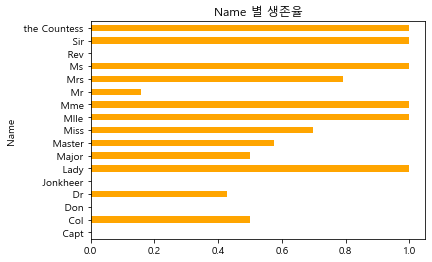

In [92]:
plt.rc('font',family='Malgun Gothic')
titanic_df.groupby('Name')['Survived'].mean().plot(kind='barh',color='orange')
plt.title('Name 별 생존율')

#### -> insight
1. Lady, the Countess , Sir, Ms, Mme, Mlle:1.0
2. Mrs Mr Major Dr Col:평균 0.5
3. Miss < Mrs -> 기혼 여성의 생존율이 더 높음
4. Mr < Ms : 여성의 생존율이 3배 이상 높음




Text(0.5, 1.0, '성별 기준 생존율 비교')

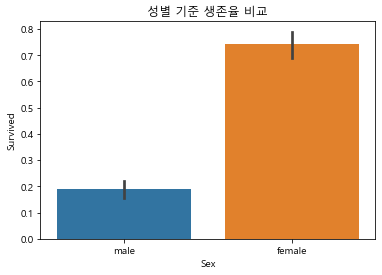

In [93]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)
plt.title('성별 기준 생존율 비교')

<AxesSubplot:xlabel='Ticket', ylabel='Survived'>

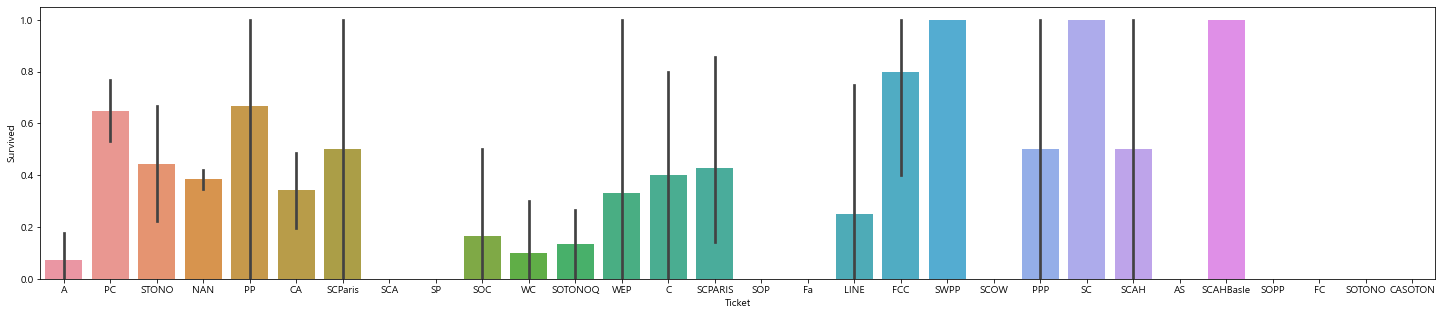

In [94]:
plt.figure(figsize=(25,5))
sns.barplot(x='Ticket',y='Survived',data=titanic_df)



Text(0.5, 1.0, 'Pclass 기준 생존율 비교')

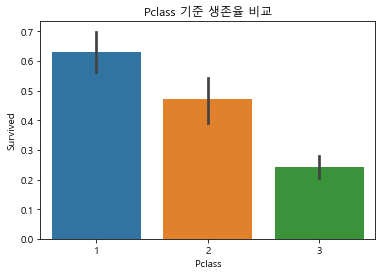

In [95]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df)
plt.title('Pclass 기준 생존율 비교')

Text(0.5, 1.0, '세대별 생존율')

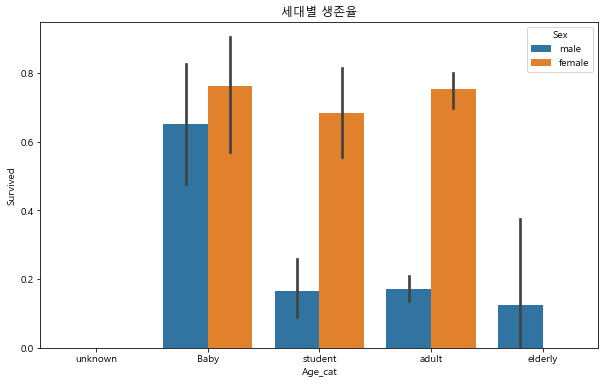

In [96]:
#입력 값에 따라서 구분값을 반환하는 함수를 설정한다.
def function1(age):
    cat=''
    if age<=0:
        cat='unknown'
    elif age<=5: 
        cat='Baby'
    elif age <=19:
        cat='student'
    elif age<=65:
        cat='adult'
    else:
        cat='elderly'
        
    return cat
#막대 그래프의 크기를 지정한다.

plt.figure(figsize=(10,6))
#x축의 값을 순차적으로 표시한다.: 함수에 주어진 값이랑 x_label이랑 같아야한다.
x_label=['unknown','Baby','student','adult','elderly']

#위에 지정하였던 함수를 반환한다.
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: function1(x))
#그래프 그리기
#x축의 값 option:order
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=x_label)
#삭제하기
plt.title('세대별 생존율')

##### 노인 여성은 아무도 생존하지 않은 것일까?

In [97]:

titanic_df[titanic_df['Age']>=65]['Sex'].value_counts()

# male: 1, femaie:2

male    11
Name: Sex, dtype: int64

##### -> female은 없는 것을 보아 여성 노인의 생존율이 없는 것이 아니라, 여성 노인이 배에 탑승하지 않아 위처럼 집계된것으로 보임.

In [98]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_cat      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [99]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,Mr,male,22.000000,1,0,A,7.2500,N,S,adult
1,2,1,1,Mrs,female,38.000000,1,0,PC,71.2833,C,C,adult
2,3,1,3,Miss,female,26.000000,0,0,STONO,7.9250,N,S,adult
3,4,1,1,Mrs,female,35.000000,1,0,NAN,53.1000,C,S,adult
4,5,0,3,Mr,male,35.000000,0,0,NAN,8.0500,N,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.000000,0,0,NAN,13.0000,N,S,adult
887,888,1,1,Miss,female,19.000000,0,0,NAN,30.0000,B,S,student
888,889,0,3,Miss,female,29.699118,1,2,WC,23.4500,N,S,adult
889,890,1,1,Mr,male,26.000000,0,0,NAN,30.0000,C,C,adult


### 라벨인코딩[type이 object인 것을 변환하자]

In [100]:
#데이터 전처리: 레이블 인코딩 진행하기 : 0~ 숫자값으로 변환하기

#불연속형변수:Cabin Embarked Sex  Name
from sklearn import preprocessing
def encode_features(dataDF):
    #기존에 대해 Ticket Name을 추가
    features=['Cabin','Embarked','Sex','Name','Ticket']
    for i in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[i])
        dataDF[i]=le.transform(dataDF[i])
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,11,1,22.0,1,0,0,7.2500,7,3,adult
1,2,1,1,12,0,38.0,1,0,10,71.2833,2,0,adult
2,3,1,3,8,0,26.0,0,0,26,7.9250,7,3,adult
3,4,1,1,12,0,35.0,1,0,9,53.1000,2,3,adult
4,5,0,3,11,1,35.0,0,0,9,8.0500,7,3,adult


In [101]:
titanic_df.info()

titanic_df.drop(columns=['Age_cat','Name'],inplace=True)
#label encoing: name, age_cat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
 12  Age_cat      891 non-null    object 
dtypes: float64(2), int32(5), int64(5), object(1)
memory usage: 73.2+ KB


### 이상치: 

연속형 변수에 한하여 이상치를 파악하고 제거

연속형 변수:Ticket, Age, Fare(요금),Cabin ,Embarked


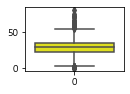

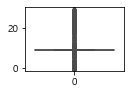

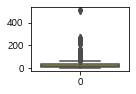

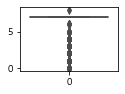

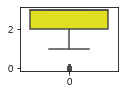

In [102]:
plt.subplot(331)
sns.boxplot(data=titanic_df['Age'],color='yellow')
plt.show()

plt.subplot(333)
sns.boxplot(data=titanic_df['Ticket'],color='yellow')
plt.show()

plt.subplot(335)
sns.boxplot(data=titanic_df['Fare'],color='yellow')
plt.show()

plt.subplot(337)
sns.boxplot(data=titanic_df['Cabin'],color='yellow')
plt.show()


plt.subplot(339)
sns.boxplot(data=titanic_df['Embarked'],color='yellow')
plt.show()

In [103]:

titanic_df[titanic_df['Fare']>300]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,0,35.0,0,0,10,512.3292,7,0
679,680,1,1,1,36.0,0,1,10,512.3292,1,0
737,738,1,1,1,35.0,0,0,10,512.3292,1,0


In [104]:
#삭제하기(Fare d이 300이하)

titanic_df=titanic_df[titanic_df['Fare']<=300]

In [105]:
##별도의 테스트 데이터 세트를 추출하기
from sklearn.model_selection import train_test_split
X_titanic_df=titanic_df.drop('Survived',axis=1)
y_titanic_df=titanic_df['Survived']
X_train, x_test, Y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.3, random_state=11)
print(X_train.shape,x_test.shape,Y_train.shape, y_test.shape)

(621, 10) (267, 10) (621,) (267,)


In [106]:
#train set 을 train/ validation set 으로 분리하기

x_train, x_val, y_train, y_val=train_test_split(X_train,Y_train,test_size=0.2, stratify=Y_train,random_state=1)
print(x_train.shape,x_val.shape,y_train.shape, y_val.shape)


(496, 10) (125, 10) (496,) (125,)


In [107]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(496, 10) (496,)
(267, 10) (267,)


In [108]:
from sklearn.tree import DecisionTreeClassifier #의사결정나무
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.linear_model import LogisticRegression #로지스틱회귀
from sklearn.linear_model import LinearRegression


from sklearn.metrics import accuracy_score #정확도산출
from sklearn.metrics import confusion_matrix

import lightgbm as lgb
from sklearn.linear_model import Ridge


In [109]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Sex          888 non-null    int32  
 4   Age          888 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Ticket       888 non-null    int32  
 8   Fare         888 non-null    float64
 9   Cabin        888 non-null    int32  
 10  Embarked     888 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 69.4 KB


In [33]:
#classifier클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression(random_state=11)
lr=LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
gbm = lgb.LGBMRegressor(num_leaves=31,learning_rate=0.05, n_estimators=20)
linear_model=Ridge(fit_intercept=False,solver='lsqr')
#1. 의사결정나무
dt_clf.fit(x_train,y_train)
pred_train=dt_clf.predict(x_train)
pred_val=dt_clf.predict(x_val)
print('1 정확도: {0:.4f}'.format(accuracy_score(y_train, pred_train)))
print('1 정확도: {0:.4f}'.format(accuracy_score(y_val, pred_val)))
pred_test=dt_clf.predict(x_test)
print('1 최종 정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test)))

#2. 랜덤포레스트
rf_clf.fit(x_train,y_train)
pred_train=rf_clf.predict(x_train)
pred_val=rf_clf.predict(x_val)
print('2 정확도: {0:.4f}'.format(accuracy_score(y_train, pred_train)))
print('2 정확도: {0:.4f}'.format(accuracy_score(y_val, pred_val)))
pred_test_rf_clf=rf_clf.predict(x_test)
print('2 최종 정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test_rf_clf)))
#3. 로지스틱회귀
lr_clf.fit(x_train,y_train)
pred_train=lr_clf.predict(x_train)
pred_val=lr_clf.predict(x_val)
print('3 정확도: {0:.4f}'.format(accuracy_score(y_train, pred_train)))
print('3 정확도: {0:.4f}'.format(accuracy_score(y_val, pred_val)))
pred_test_lr_clf=lr_clf.predict(x_test)
print('3 최종 정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test_lr_clf)))


#최종정확도에서 랜덤포레스트가 가장높다.

1 정확도: 1.0000
1 정확도: 0.7680
1 최종 정확도: 0.7828
2 정확도: 1.0000
2 정확도: 0.8320
2 최종 정확도: 0.8240
3 정확도: 0.7823
3 정확도: 0.8320
3 최종 정확도: 0.8052


C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



#### 랜덤포레스트 값이 최종적으로 높게 나오나 과적합된것을 볼 수 있었음


In [34]:
#오류가 뜨는 모델
#오류코드:Classification metrics can't handle a mix of binary and continuous targets
#원인: 회귀모델인데 분류정확도평가를 사용하였기 때문이다.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#4.linear regression
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_val=lr.predict(x_val)
print('4 정확도: {0:.4f}'.format(mean_squared_error(y_train, pred_train)))
print('4 정확도: {0:.4f}'.format(mean_squared_error(y_val, pred_val)))
pred_test=lr.predict(x_test)
print('4 최종 정확도: {0:.4f}'.format(mean_squared_error(y_test,pred_test)))
print('4 최종 정확도(r2): {0:.4f}'.format(r2_score(y_test,pred_test)))


#5. lgbm
gbm.fit(x_train,y_train)
pred_train=gbm.predict(x_train)
pred_val=gbm.predict(x_val)
print('5 정확도: {0:.4f}'.format(mean_squared_error(y_train, pred_train)))
print('5 정확도: {0:.4f}'.format(mean_squared_error(y_val, pred_val)))
pred_test=gbm.predict(x_test)
print('5 최종 정확도: {0:.4f}'.format(mean_squared_error(y_test,pred_test)))
print('5 최종 정확도(r2): {0:.4f}'.format(r2_score(y_test,pred_test)))


#6.ridge
linear_model.fit(x_train,y_train)
pred_train=linear_model.predict(x_train)
pred_val=linear_model.predict(x_val)
print('6 정확도: {0:.4f}'.format(mean_squared_error(y_train, pred_train)))
print('6 정확도: {0:.4f}'.format(mean_squared_error(y_val, pred_val)))
pred_test=linear_model.predict(x_test)
print('6 최종 정확도: {0:.4f}'.format(mean_squared_error(y_test,pred_test)))
print('6 최종 정확도(r2): {0:.4f}'.format(r2_score(y_test,pred_test)))

4 정확도: 0.1535
4 정확도: 0.1406
4 최종 정확도: 0.1268
4 최종 정확도(r2): 0.4702
5 정확도: 0.1372
5 정확도: 0.1350
5 최종 정확도: 0.1389
5 최종 정확도(r2): 0.4199
6 정확도: 0.2231
6 정확도: 0.2383
6 최종 정확도: 0.2392
6 최종 정확도(r2): 0.0008


####  linear regression이 가장 높음(r2 score& mse)

# 교차검증

In [35]:
#1.kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#만들기(kfold)
kfold=KFold(n_splits=5)

#적용하기



print('기존 로지스틱회귀 정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test_lr_clf)))
print('기존 랜덤포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test_rf_clf)))

기존 로지스틱회귀 정확도: 0.8052
기존 랜덤포레스트 정확도: 0.8240


In [36]:
#case1
score_list_lr=cross_val_score(lr_clf, X_titanic_df,y_titanic_df)
score_list_rf=cross_val_score(rf_clf, X_titanic_df,y_titanic_df)

result_lr=list(map(lambda x:'{score:.2f}'.format(score=x),score_list_lr))
result_rf=list(map(lambda x:'{score:.2f}'.format(score=x),score_list_rf))

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [37]:
print('로직스틱 회귀 교차검증 후 예측값:',result_lr)

print('랜덤 포레스트 교차검증 후 예측값:',result_rf)

로직스틱 회귀 교차검증 후 예측값: ['0.74', '0.80', '0.78', '0.77', '0.80']
랜덤 포레스트 교차검증 후 예측값: ['0.74', '0.79', '0.85', '0.81', '0.86']


In [38]:
## 교차검증
#case2
score_list=cross_val_score(lr_clf, X_titanic_df,y_titanic_df, cv=5)
print('로지스틱 k fold:',score_list)

score_list=cross_val_score(rf_clf, X_titanic_df,y_titanic_df, cv=5)
print('랜덤 포레스트 k fold:',score_list)

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

로지스틱 k fold: [0.74157303 0.79775281 0.7752809  0.76836158 0.79661017]
랜덤 포레스트 k fold: [0.74157303 0.78651685 0.84831461 0.8079096  0.85875706]


In [39]:
#case3
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr_clf, X_titanic_df, y_titanic_df, cv=5)
for a, b in enumerate(scores):
    print('교차 검증의 정확도{1:.4f}'.format(a,b))
#평균은?    
print('평균 정확도:',np.mean(scores))



교차 검증의 정확도0.7416
교차 검증의 정확도0.7978
교차 검증의 정확도0.7753
교차 검증의 정확도0.7684
교차 검증의 정확도0.7966
평균 정확도: 0.7759156985970926


C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [40]:
#GridSearchCV : 최적 하이퍼 파라미터를 찾아서 성능을 측정하기
from sklearn.model_selection import GridSearchCV



parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_split':[1,5,8]}

#
grid_clf=GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy',cv=5)

#
grid_clf.fit(x_train,y_train)
grid_clf.fit(x_val, y_val)
#
best_clf=grid_clf.best_estimator_




pred_val=best_clf.predict(x_val)
accuracy_val=accuracy_score(pred_val, y_val)


pred_test=best_clf.predict(x_test)
accuracy_test=accuracy_score(pred_test, y_test)

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 777, in

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 777, in

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 777, in

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 777, in

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.7559798  0.7559798         nan 0.75191919 0.75191919
        nan 0.78822222 0.78620202        nan 0.79018182 0.79024242]
  warnings.warn(
C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 777, in

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 777, in

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ns451\Documents\anaconda_1\lib\site-packages\joblib\parallel.py", line 777, in

C:\Users\ns451\Documents\anaconda_1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [  nan 0.808 0.8     nan 0.824 0.848   nan 0.824 0.832   nan 0.816 0.832]
  warnings.warn(


In [41]:
print(best_clf)
print("랜덤포레스트 최적의 파라미터 구한 후 정확도 측정시 train 정확도{0:.4f}".format(accuracy_val))
print("랜덤포레스트 최적의 파라미터 구한 후 정확도 측정시 validation 정확도 {0:.4f}".format(accuracy_test))

RandomForestClassifier(max_depth=3, min_samples_split=8, random_state=11)
랜덤포레스트 최적의 파라미터 구한 후 정확도 측정시 train 정확도0.8880
랜덤포레스트 최적의 파라미터 구한 후 정확도 측정시 validation 정확도 0.8352
